<a href="https://colab.research.google.com/github/yessss28/Estadistica/blob/main/ProyectoU3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PORTADAS

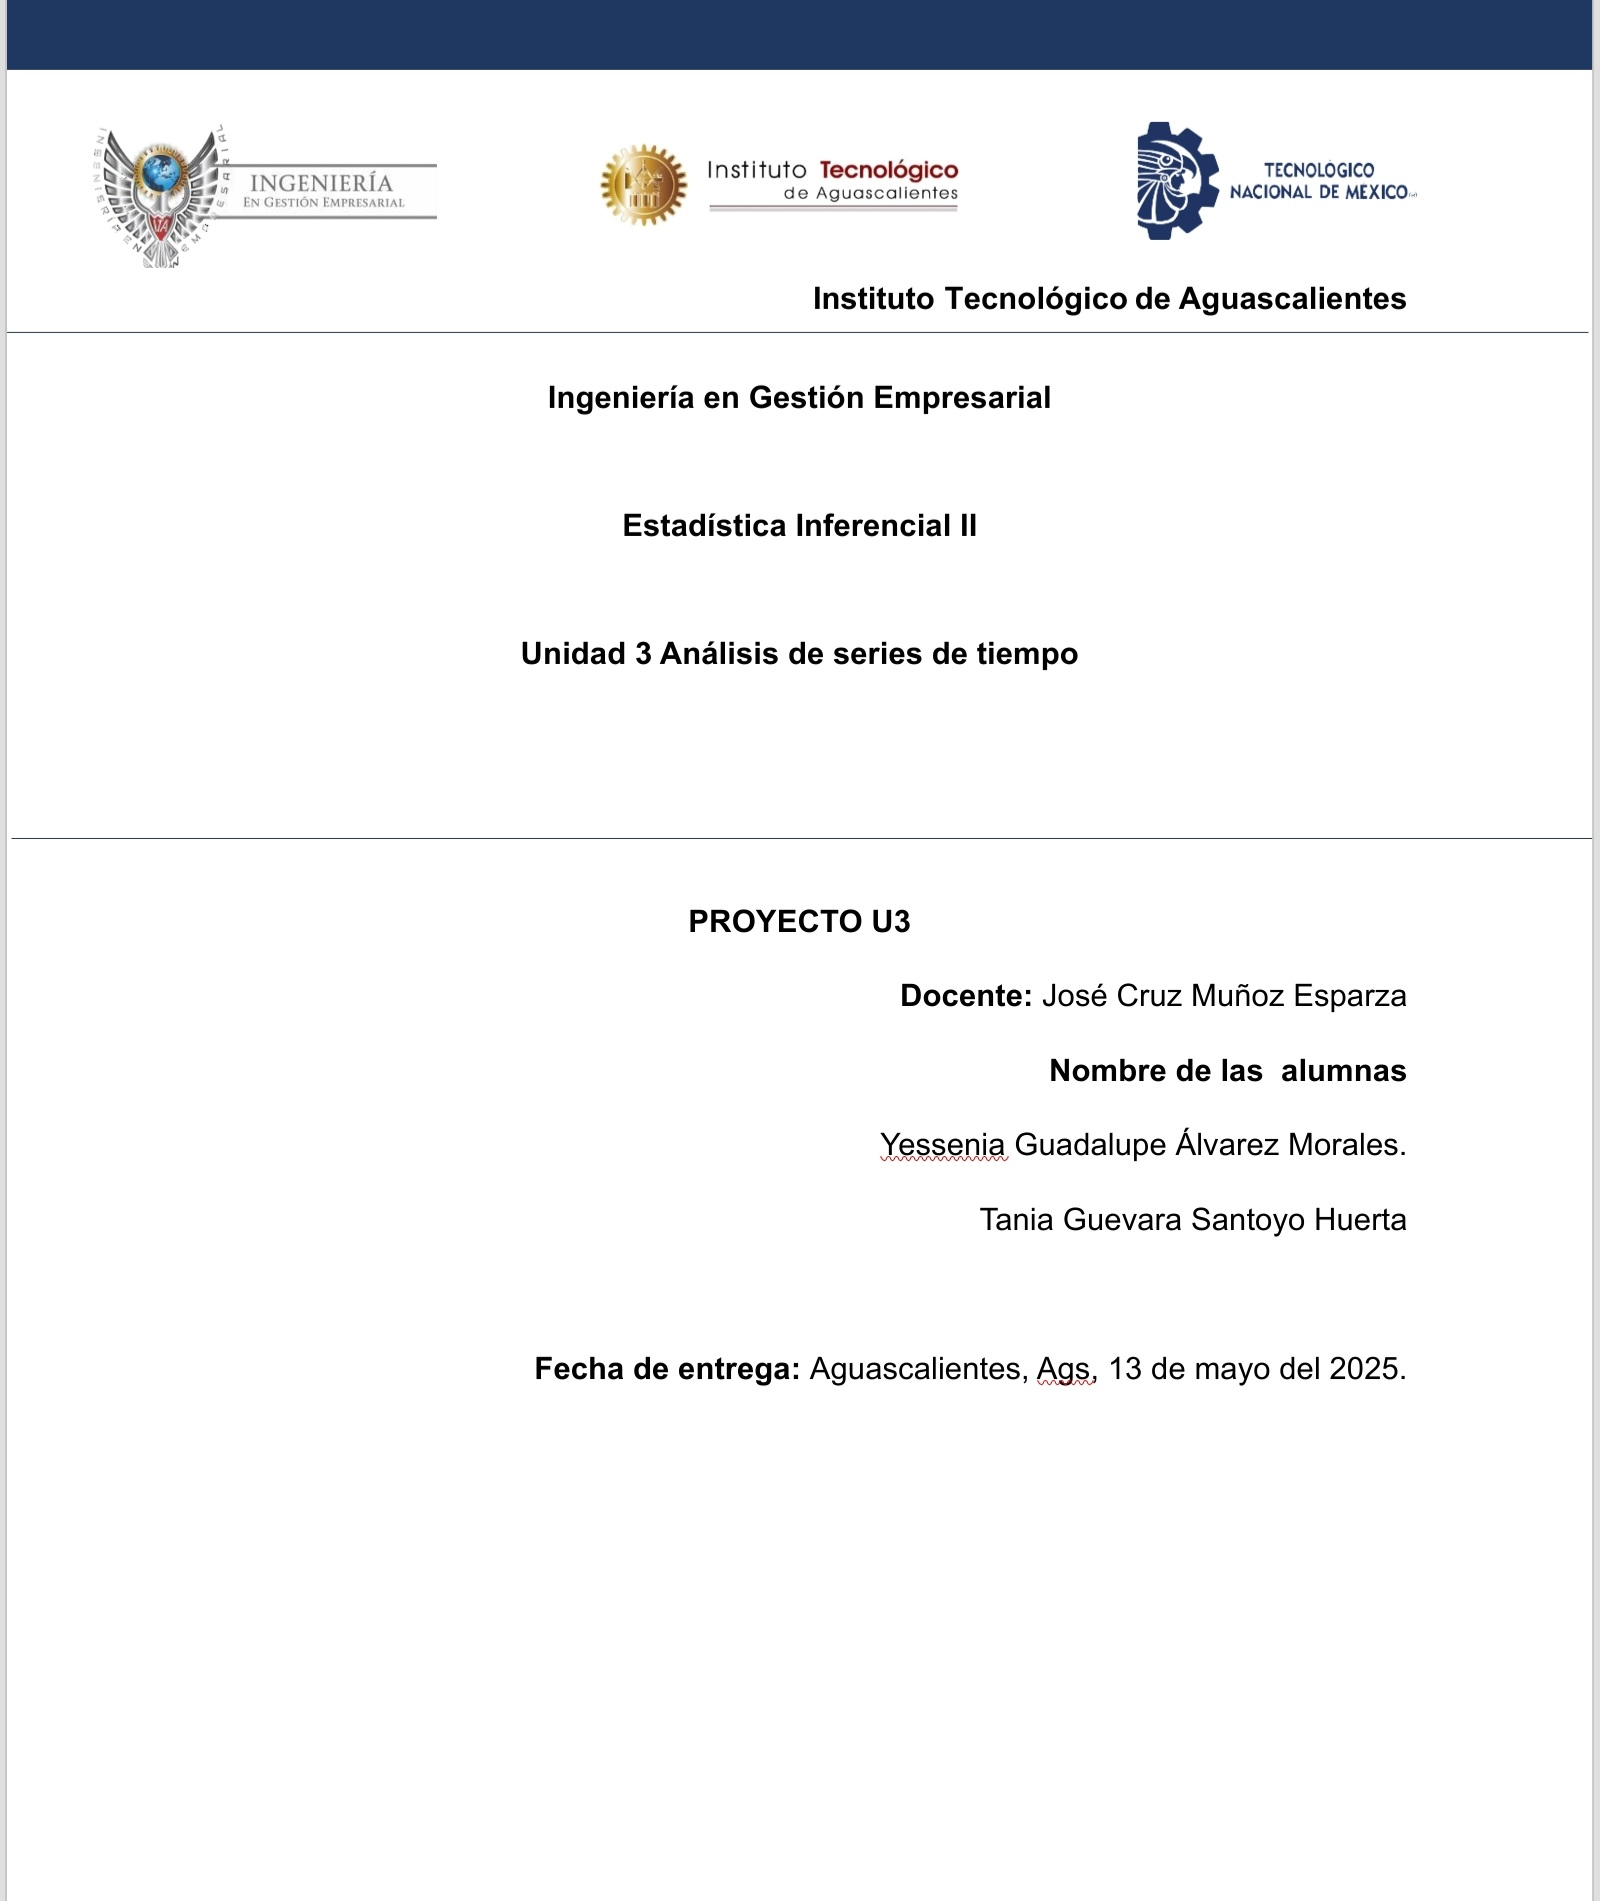

# INTRODUCCIÓN

Este proyecto analiza el comportamiento de las acciones de Apple Inc. (AAPL), enfocándose en su tendencia histórica, estacionariedad, y predicción de precios futuros. También se incluye una breve comparación con TSMC (TSM) para observar correlaciones y volatilidad entre ambas.



# HIPOTESIS

Se plantea que:

La serie de precios de AAPL no es estacionaria.

Es posible identificar tendencias y patrones mediante análisis estadístico y modelado.

Herramientas como Prophet permiten predecir futuras variaciones con cierto grado de incertidumbre.


# MARCO TEORICO

Se aplican los siguientes conceptos:

Series temporales y su análisis mediante técnicas estadísticas.

Prueba ADF (Dickey-Fuller Aumentada) para la estacionariedad.

Medias móviles simples y análisis técnico.

Modelado polinómico para visualizar la tendencia.

Modelo Prophet de Facebook para predicción de series temporales.

Correlación cruzada (CCF) para evaluar relación entre AAPL y TSMC.


# METODOLOGIA

1. Recolección de precios históricos de AAPL y TSM desde Yahoo Finance.


2. Análisis de tendencias con medias móviles y regresión polinómica.


3. Evaluación de estacionariedad con la prueba ADF.


4. Predicción de precios con el modelo Prophet.


5. Comparación con TSM mediante análisis de volatilidad y correlación.


# APPLE

In [1]:
#1.Seleccionar una marca y obtener los datos:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers='AAPL',            # tickers: AAPL: 	Microsoft Corporation Common Stock
    start='2022-08-01',        # Fecha de inicio
    end='2025-08-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  1 of 1 completed


,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume
Date,,,,,,
2022-08-01,161.009995,163.589996,160.889999,161.509995,158.959778,67829400
2022-08-02,160.100006,162.410004,159.630005,160.009995,157.483444,59907000
2022-08-03,160.839996,166.589996,160.750000,166.130005,163.506836,82507500
2022-08-04,166.009995,167.190002,164.429993,165.809998,163.191864,55474100
2022-08-05,163.210007,165.850006,163.000000,165.350006,162.965179,56697000
...,...,...,...,...,...,...
2025-05-07,199.169998,199.440002,193.250000,196.250000,195.992981,68536700
2025-05-08,197.720001,200.050003,194.679993,197.490005,197.231369,50478900
2025-05-09,199.000000,200.539993,197.539993,198.529999,198.270004,36453900


In [2]:
pip install alpha_vantage

In [3]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Entra a https://www.alphavantage.co/support/#api-key
# Registrate para obtener tu api-key

# Tu clave de API (reemplaza esta por la tuya)
my_key = 'NP1OLRVZ3YSCPCWY'   # esta es mía, no la uses o habrá problemas
#Clave PAULINA
# Crear objeto TimeSeries
ts = TimeSeries(key=my_key, output_format='pandas')

# Obtener datos diarios de MSFT
ticker = 'AAPL'
data, meta = ts.get_daily(symbol=ticker, outputsize='full')

columnas = [ticker + '_' + i for i in ['Open', 'High', 'Low', 'Close', 'Volume']]
data.columns = columnas

inicio = '2022-08-01'
fin = '2025-08-01'
df = data[(data.index >= inicio) & (data.index <= fin)]

df

,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Volume
date,,,,,
2025-05-12,210.970,211.2679,206.7500,210.79,63775814.0
2025-05-09,199.000,200.5399,197.5350,198.53,36453923.0
2025-05-08,197.720,200.0500,194.6796,197.49,50478872.0
2025-05-07,199.170,199.4400,193.2500,196.25,68616943.0
2025-05-06,198.210,200.6500,197.0200,198.51,51216482.0
...,...,...,...,...,...
2022-08-05,163.210,165.8500,163.0000,165.35,56696985.0
2022-08-04,166.005,167.1900,164.4300,165.81,55474144.0
2022-08-03,160.840,166.5900,160.7500,166.13,82507488.0


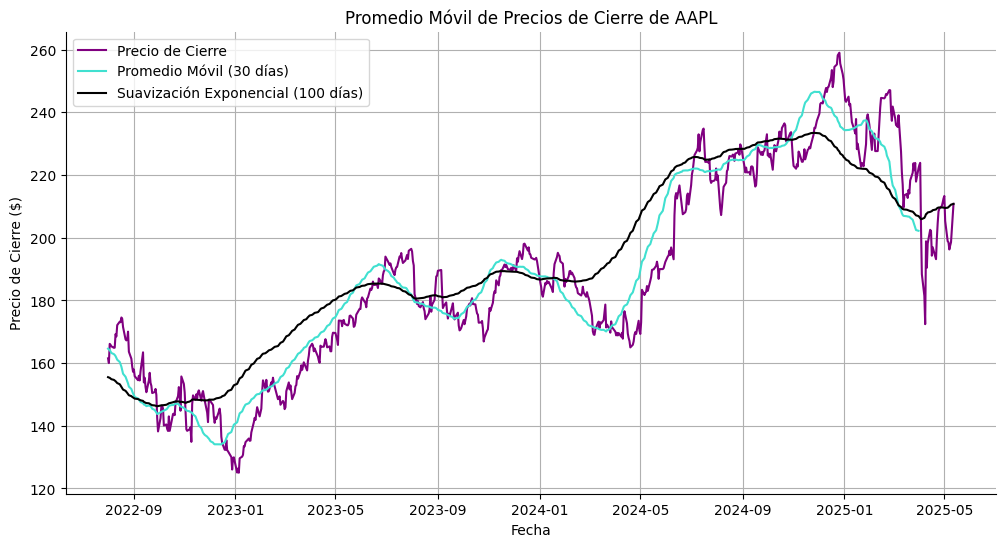

In [4]:
#Graficar la serie de tiempo:
# Promedio Móvil Simple
ventana_sma = 30
df['SMA'] = df['AAPL_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 100
df['SES'] = df['AAPL_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['AAPL_Close'], label='Precio de Cierre', color='purple')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='turquoise')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='black')
plt.title('Promedio Móvil de Precios de Cierre de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


 * Apple experimentó una tendencia alcista significativa desde 2023 hasta finales de 2024.

 * Ha habido fluctuaciones a corto plazo dentro de esta tendencia general, como lo indican los movimientos de la línea turquesa.

 * Los cruces de las medias móviles podrían haber proporcionado señales de compra y venta a lo largo del tiempo.

 * Hacia principios de 2025, parece haber un debilitamiento de la tendencia alcista, indicado por el cruce bajista de las medias móviles y la reciente caída en el precio.



In [5]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['AAPL_Close'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF: -1.3621285959411753
p-value: 0.6002915430460491
La tendencia no es estacionaria (aceptamos la hipótesis nula).



 * Estadístico ADF: -1.3621285959411753: Este es el valor calculado del estadístico de prueba ADF.
 * p-value: 0.6002915430460491: Este es el valor p de la prueba.
 * La tendencia no es estacionaria (aceptamos la hipótesis nula).: Esta es la conclusión basada en la comparación del valor p con el nivel de significancia (0.05). Dado que el valor p (0.6003) es mayor que 0.05, no se puede rechazar la hipótesis nula.
En resumen, la prueba de Dickey-Fuller aplicada a los precios de cierre de AAPL sugiere que la serie temporal no es estacionaria. Esto implica que las propiedades estadísticas de la serie (como la media y la varianza) varían con el tiempo, lo que puede tener implicaciones importantes para el modelado y la predicción de esta serie temporal. Para hacerla estacionaria, a menudo se aplican técnicas como la diferenciación.

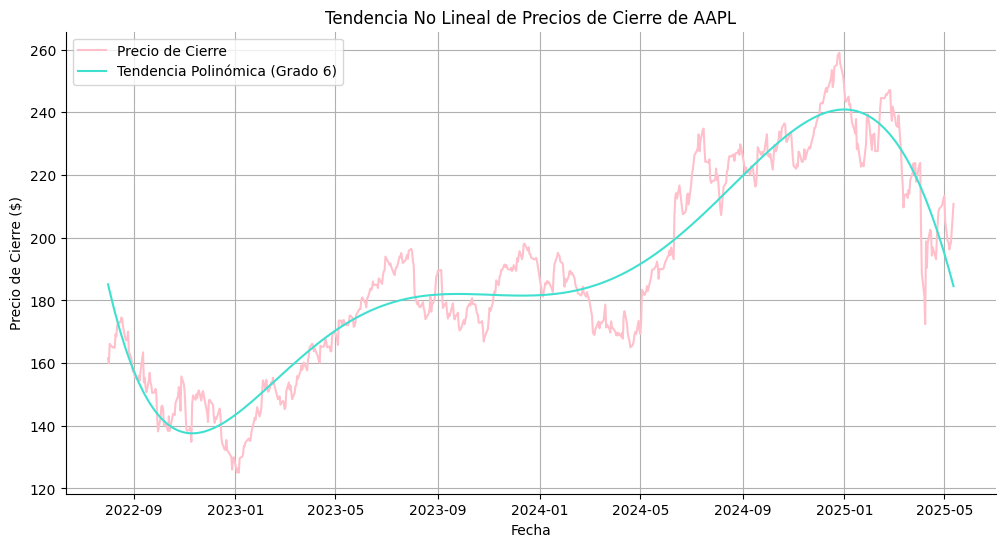

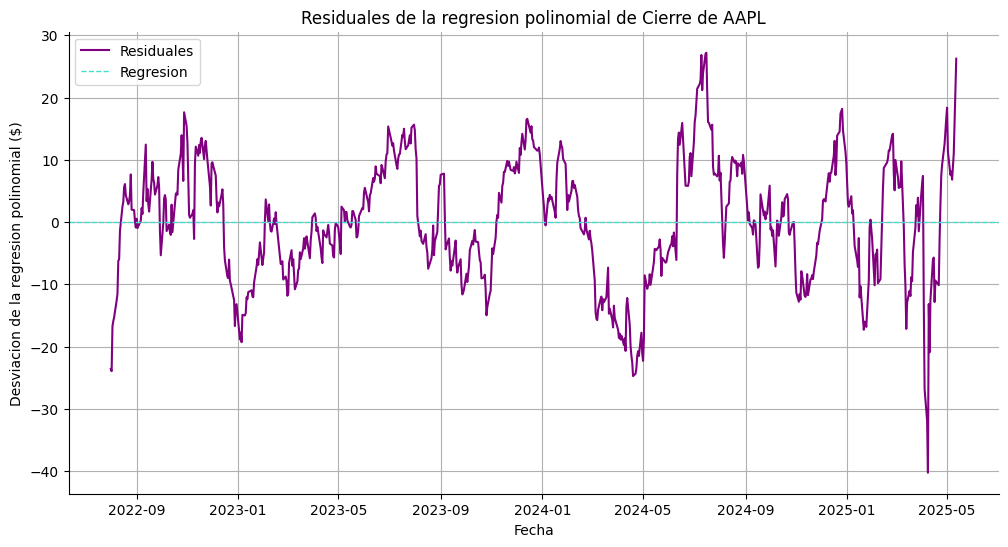

In [6]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['AAPL_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 6
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='pink'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='turquoise')
plt.title('Tendencia No Lineal de Precios de Cierre de AAPL') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)

#2. Prueba de estacionariedad en los residuales:
# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='purple')
plt.axhline(0, color='turquoise', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Este gráfico sugiere que la tendencia a largo plazo del precio de AAPL durante el periodo observado no fue lineal.

 Hubo una fase inicial de caída, seguida de un periodo de crecimiento significativo, y más recientemente, una posible reversión de la tendencia hacia una fase de declive.

 La curva polinómica de grado 6 proporciona una forma de visualizar esta tendencia subyacente, suavizando la volatilidad diaria del precio.

 El gráfico de residuales sugiere que la regresión polinómica de grado 6 captura una parte importante de la tendencia del precio de AAPL, pero no explica todas las fluctuaciones.

 Los residuales muestran una variabilidad considerable y posiblemente heterocedasticidad, lo que indica que el modelo podría no ser una predicción perfecta del precio diario.

 Un análisis más profundo de estos residuales podría ayudar a determinar si se necesitan modelos más complejos o si los errores son simplemente ruido aleatorio alrededor de la tendencia subyacente.

In [7]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['Poly_Resid'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF (residuales):', adf_test[0])
print('p-value (residuales):', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF (residuales): -4.72113745548863
p-value (residuales): 7.678625376312422e-05
La tendencia es estacionaria (rechazamos la hipótesis nula).


Estadístico ADF (residuales): -4.72113745548863:
Este es el valor del estadístico ADF calculado para los residuales. Es un valor más negativo que el que obtuvimos para la serie de precios original.

 * p-value (residuales): 7.678625376312422e-05: Este es el valor p de la prueba ADF aplicada a los residuales. Este valor es extremadamente pequeño (0.00007678...).

 * La tendencia es estacionaria (rechazamos la hipótesis nula).: Esta es la conclusión basada en la comparación del valor p con el nivel de significancia (0.05). Dado que el valor p (aproximadamente 0.000077) es mucho menor que 0.05, se rechaza la hipótesis nula.

En resumen, la prueba de Dickey-Fuller aplicada a los residuales de la regresión polinomial sugiere que los residuales son estacionarios.

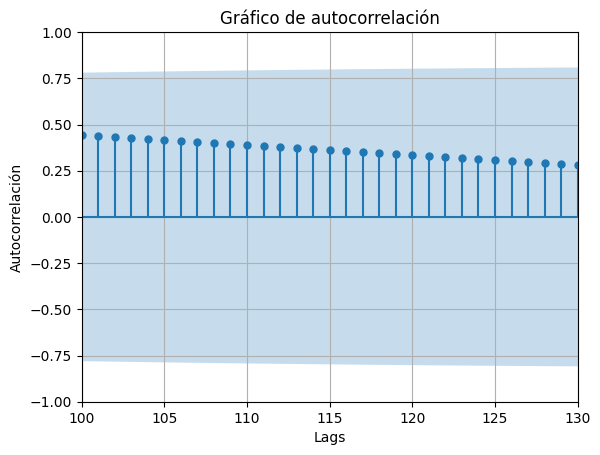

In [8]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

nivel_de_significancia = 0.05

plot_acf(
    df['AAPL_Close'],
    lags=130,
    alpha=nivel_de_significancia
    )

plt.xlim([100, 130])
plt.ylim([-1, 1])
plt.title('Gráfico de autocorrelación')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.grid()
plt.show()

Basándonos únicamente en este gráfico que muestra los rezagos tardíos, podemos concluir que no hay autocorrelación significativa en los residuales del modelo polinómico para estos rezagos, lo que es un resultado positivo para la validez del modelo.

 Sería recomendable examinar también los primeros rezagos para una evaluación más completa.

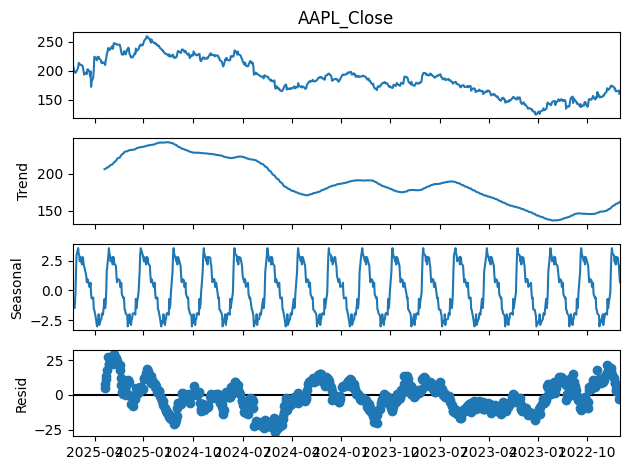

In [9]:
# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion = sm.tsa.seasonal_decompose(
    df['AAPL_Close'],
    model='additive',
    period=40,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 días de negociación al año
fig = descomposicion.plot()
plt.show()

La descomposición de la serie temporal del precio de cierre de AAPL revela una tendencia subyacente con fases de crecimiento y posible estabilización o ligero descenso.

Además, se identifica un patrón estacional repetitivo de corto plazo.

El componente residual representa las fluctuaciones irregulares que no se explican por estos dos componentes.

Es importante notar la posible inversión en el eje de tiempo, lo que dificulta una interpretación cronológica precisa sin corregir la orientación de las fechas.

Asumiendo que el tiempo avanza de derecha a izquierda en el gráfico, la tendencia muestra una subida y luego una posible bajada reciente.

Para una interpretación más detallada de la estacionalidad, necesitaríamos conocer la frecuencia de los datos (diaria, semanal, etc.) para entender el periodo de repetición del patrón estacional.

# TSMC

In [10]:
#1.Seleccionar una marca y obtener los datos:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers='TSMC',            # tickers: AAPL: 	Apple Inc. Common Stock
    start='2022-08-01',        # Fecha de inicio
    end='2025-08-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TSMC']: HTTPError('HTTP Error 404: ')


,TSMC_Open,TSMC_High,TSMC_Low,TSMC_Close,TSMC_Adj Close,TSMC_Volume
Date,,,,,,


In [11]:
pip install alpha_vantage

In [12]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Entra a https://www.alphavantage.co/support/#api-key
# Registrate para obtener tu api-key

# Tu clave de API (reemplaza esta por la tuya)
my_key = 'NP1OLRVZ3YSCPCWY'   # esta es mía, no la uses o habrá problemas

# Crear objeto TimeSeries
ts = TimeSeries(key=my_key, output_format='pandas')

# Obtener datos diarios de TSMC
# Change the ticker from 'TSMC' to 'TSM' which is the NYSE symbol for TSMC
ticker = 'TSM'
data, meta = ts.get_daily(symbol=ticker, outputsize='full')

columnas = [ticker + '_' + i for i in ['Open', 'High', 'Low', 'Close', 'Volume']]
data.columns = columnas

inicio = '2024-01-01'
fin = '2025-04-01'
df = data[(data.index >= inicio) & (data.index <= fin)]

df

,TSM_Open,TSM_High,TSM_Low,TSM_Close,TSM_Volume
date,,,,,
2025-04-01,166.39,168.87,165.0600,168.64,9180009.0
2025-03-31,160.36,166.13,159.7300,166.00,19408272.0
2025-03-28,168.04,168.63,164.0600,165.25,16331998.0
2025-03-27,171.39,171.61,167.5500,168.24,17559075.0
2025-03-26,179.23,179.55,171.4662,173.50,14644601.0
...,...,...,...,...,...
2024-01-08,100.63,102.79,100.5000,102.24,12455556.0
2024-01-05,99.00,100.64,98.8000,99.61,7339396.0
2024-01-04,99.53,100.44,99.1200,99.13,7996713.0


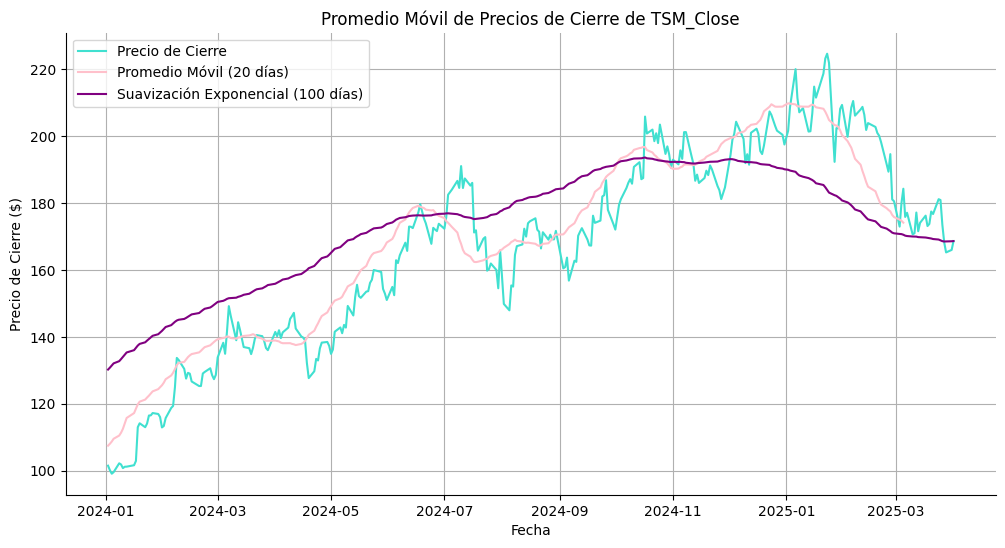

In [16]:
# Promedio Móvil Simple
ventana_sma = 20
df['SMA'] = df['TSM_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 100
df['SES'] = df['TSM_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['TSM_Close'], label='Precio de Cierre', color='turquoise')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='pink')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='purple')
plt.title('Promedio Móvil de Precios de Cierre de TSM_Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

* A principios de 2024, el precio de cierre, el promedio móvil de 20 días y la suavización exponencial de 100 días mostraban una tendencia alcista.

 * A mediados de 2024, el precio alcanzó un máximo y comenzó a mostrar mayor volatilidad. El promedio móvil de 20 días reaccionó más rápidamente a este cambio, mientras que la suavización exponencial de 100 días continuó mostrando una tendencia alcista, aunque con una pendiente decreciente.

 * Hacia finales de 2024 y principios de 2025, se observa una corrección en el precio de cierre, con el promedio móvil de 20 días cayendo por debajo de la suavización exponencial de 100 días en algunos momentos.

  Esto podría interpretarse como una señal de debilitamiento de la tendencia alcista de corto plazo frente a la tendencia de medio plazo.

 * La suavización exponencial de 100 días parece haber comenzado a aplanarse o incluso mostrar una ligera tendencia bajista hacia el final del periodo graficado, lo que podría indicar un cambio en la tendencia de medio plazo si continúa.

Para un análisis más profundo, se podrían considerar los siguientes puntos:
 * Cruces de los promedios móviles: Los cruces entre el promedio móvil de corto plazo (20 días) y el de medio plazo (100 días) son señales comunes utilizadas en el análisis técnico.

 Por ejemplo, un cruce del promedio móvil de 20 días por encima del de 100 días se considera una señal alcista, mientras que un cruce por debajo se considera bajista.

 * Volumen: Analizar el volumen de negociación junto con el precio podría proporcionar más información sobre la fortaleza de las tendencias y los movimientos.

 * Otros indicadores técnicos: La combinación de estos indicadores con otros, como el RSI o el MACD, podría ofrecer una perspectiva más completa.

 * Los traders a corto plazo podrían estar buscando oportunidades de venta ante la confirmación de la tendencia bajista del promedio móvil de 20 días.
 * Los inversores a medio plazo podrían estar atentos a si la suavización exponencial de 100 días se mantiene como resistencia, lo que confirmaría una perspectiva más negativa.
 * Sería crucial observar los próximos movimientos del precio y cómo interactúa con estos niveles clave para tener una mejor idea de la dirección futura del activo.

In [17]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['TSM_Close'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF: -0.269130586535962
p-value: 0.9297640040537503
La tendencia no es estacionaria (aceptamos la hipótesis nula).


En este caso, el valor p (0.9298) es mucho mayor que el nivel de significancia establecido de 0.05.
Según la lógica de la prueba de hipótesis:
 * Si el valor p es menor que el nivel de significancia, rechazamos la hipótesis nula y concluimos que la serie de tiempo es estacionaria.
 * Si el valor p es mayor que el nivel de significancia, no rechazamos la hipótesis nula y concluimos que la serie de tiempo no es estacionaria (tiene una raíz unitaria).
En tus resultados, dado que el valor p (0.9298) > 0.05, la prueba de Dickey-Fuller aumentada no proporciona suficiente evidencia para rechazar la hipótesis nula.
Conclusión:
Basándonos en los resultados de esta prueba ADF, concluimos que la tendencia del precio de cierre de "TSM_close" no es estacionaria. Esto sugiere que la serie de tiempo tiene una raíz unitaria, lo que implica que sus propiedades estadísticas (como la media y la varianza) cambian con el tiempo y que los choques tienen un efecto persistente en la serie.

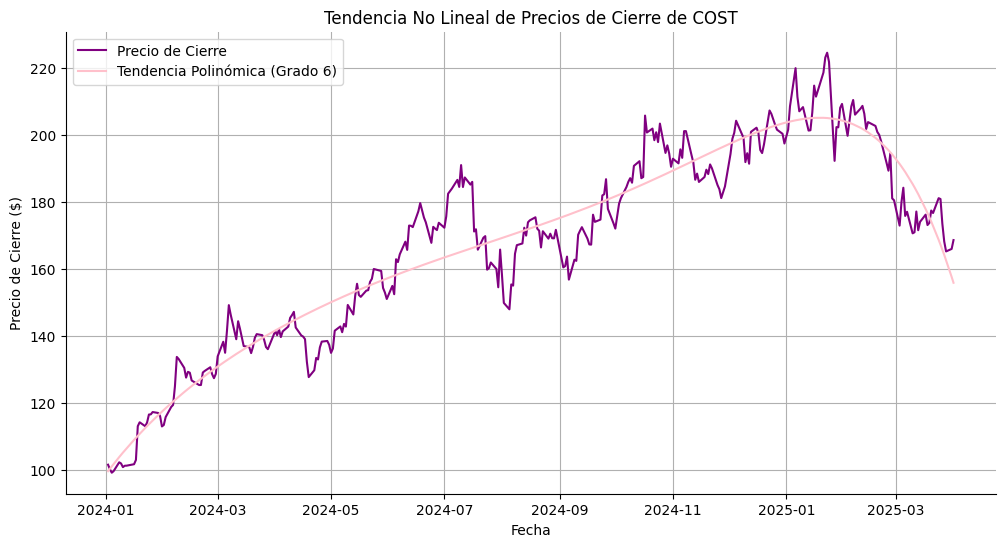

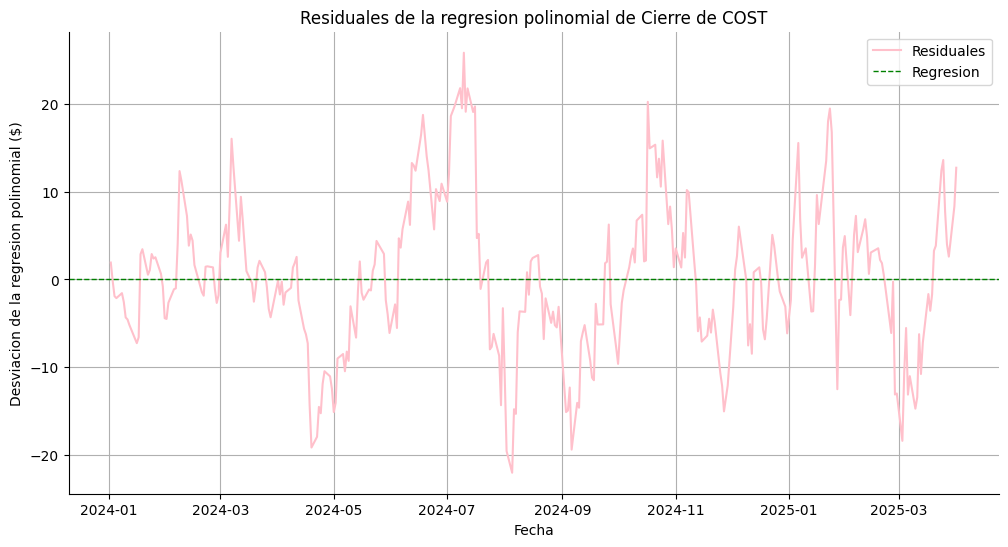

In [20]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['TSM_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 6
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='purple'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='pink')
plt.title('Tendencia No Lineal de Precios de Cierre de COST') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)

#2. Prueba de estacionariedad en los residuales:
# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='pink')
plt.axhline(0, color='green', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de COST')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

La gráfica sugiere que el precio de cierre de "COST" experimentó una tendencia alcista general durante la mayor parte de 2024, seguida de un cambio a una tendencia bajista hacia finales de 2024 y principios de 2025, según lo modelado por una tendencia polinómica de grado 6.

 Sin embargo, es importante tener en cuenta la posibilidad de sobreajuste al interpretar esta tendencia.

 La gráfica de los residuales de la regresión polinómica de grado 6 para el precio de cierre de "COST" muestra una variabilidad considerable y sugiere la posible presencia de algunos patrones no aleatorios.

 Esto indica que el modelo polinómico, aunque captura una tendencia general, podría no ser perfecto para explicar todas las fluctuaciones del precio.

In [21]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['Poly_Resid'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF (residuales):', adf_test[0])
print('p-value (residuales):', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF (residuales): -5.079883098263909
p-value (residuales): 1.538524531078589e-05
La tendencia es estacionaria (rechazamos la hipótesis nula).


En este caso, el valor p (1.54e-05) es mucho menor que el nivel de significancia de 0.05.
Aplicando la lógica de la prueba de hipótesis:
 * Dado que el valor p es menor que el nivel de significancia (0.0000154 < 0.05), rechazamos la hipótesis nula.
 * La hipótesis nula en una prueba ADF es que la serie de tiempo tiene una raíz unitaria (es decir, no es estacionaria).
Conclusión:
Basándonos en los resultados de esta prueba ADF aplicada a los residuales de la regresión polinomial, concluimos que los residuales son estacionarios.
Implicaciones Importantes:
 * El modelo de regresión polinómica parece haber capturado la tendencia no estacionaria presente en la serie original del precio de cierre. Al remover esta tendencia mediante la regresión, los errores (residuales) que quedan son ahora estacionarios.
 * Unos residuales estacionarios son una buena señal para un modelo de regresión. Esto sugiere que los errores del modelo tienen propiedades estadísticas constantes a lo largo del tiempo, lo cual es un supuesto importante para muchos análisis y pronósticos basados en modelos de regresión.
 * Esto refuerza la idea de que la tendencia polinómica de grado 6 fue una forma adecuada de modelar la parte no estacionaria de la serie de precios de "COST" en el periodo analizado.

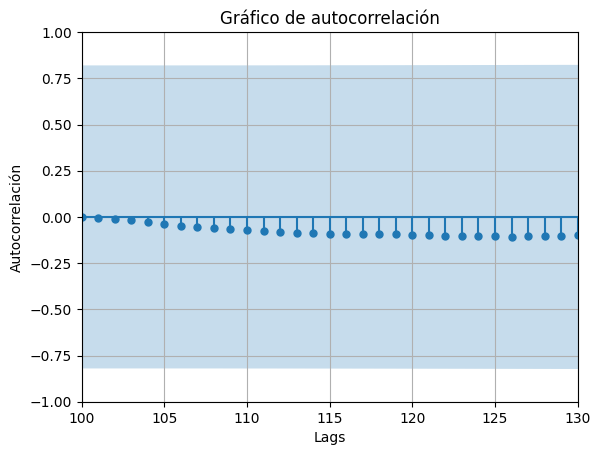

In [22]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

nivel_de_significancia = 0.05

plot_acf(
    df['TSM_Close'],
    lags=130,
    alpha=nivel_de_significancia
    )

plt.xlim([100, 130])
plt.ylim([-1, 1])
plt.title('Gráfico de autocorrelación')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.grid()
plt.show()

El gráfico de autocorrelación de los residuales indica que no hay una autocorrelación significativa en los errores del modelo de regresión polinomial de grado 6 para el precio de cierre de "COST". Esto sugiere que los errores son aproximadamente aleatorios e independientes, lo cual es un resultado favorable para la validez del modelo.

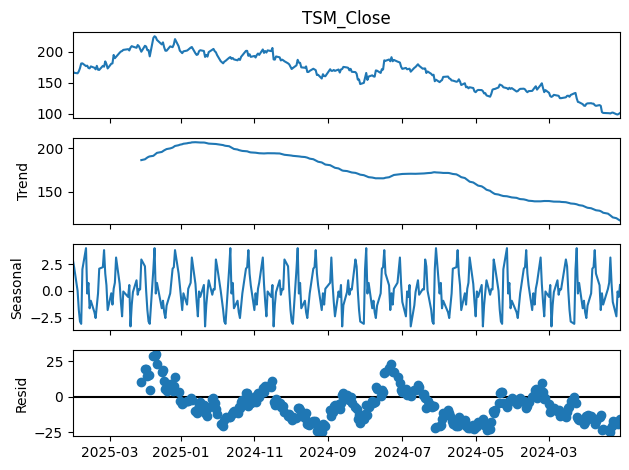

In [23]:
# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion = sm.tsa.seasonal_decompose(
    df['TSM_Close'],
    model='additive',
    period=40,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 días de negociación al año
fig = descomposicion.plot()
plt.show()

La descomposición estacional de la serie de tiempo del precio de cierre de "TSM_Close" revela lo siguiente:
 * La serie presenta una tendencia no lineal clara: Inicialmente alcista y luego bajista. Esta tendencia a largo plazo es el factor dominante en la evolución del precio.
 * Existe un componente estacional: Se observan patrones repetitivos de alta frecuencia, cuya naturaleza específica requeriría conocer la granularidad de los datos.
 * Hay un componente residual significativo: Esto indica que hay fluctuaciones en el precio que no se explican completamente por la tendencia o la estacionalidad. Estas fluctuaciones podrían deberse a eventos inesperados, ruido del mercado u otros factores no modelados.
En resumen, el precio de cierre de "TSM_Close" muestra una tendencia cambiante a lo largo del tiempo, patrones estacionales de alta frecuencia y una variabilidad residual considerable. Para un análisis más profundo, sería útil conocer la frecuencia de los datos para interpretar mejor el componente estacional y analizar las propiedades estadísticas de los residuales.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers=['AAPL', 'TSM'],            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2022-08-01',        # Fecha de inicio
    end='2025-08-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df


[*********************100%***********************]  2 of 2 completed


,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume,TSM_Open,TSM_High,TSM_Low,TSM_Close,TSM_Adj Close,TSM_Volume
Date,,,,,,,,,,,,
2022-08-01,161.009995,163.589996,160.889999,161.509995,158.959763,67829400,85.300003,86.889999,84.300003,86.309998,82.224846,20102600
2022-08-02,160.100006,162.410004,159.630005,160.009995,157.483414,59907000,84.519997,87.510002,84.169998,86.050003,81.977165,15541600
2022-08-03,160.839996,166.589996,160.750000,166.130005,163.506821,82507500,85.959999,86.769997,84.559998,86.510002,82.415398,20779400
2022-08-04,166.009995,167.190002,164.429993,165.809998,163.191879,55474100,87.000000,88.419998,86.620003,88.419998,84.234993,13472500
2022-08-05,163.210007,165.850006,163.000000,165.350006,162.965164,56697000,88.029999,90.980003,88.010002,89.769997,85.521095,13293500
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-07,199.169998,199.440002,193.250000,196.250000,195.992981,68536700,174.100006,175.979996,171.369995,174.539993,174.539993,9682500
2025-05-08,197.720001,200.050003,194.679993,197.490005,197.231369,50478900,175.339996,177.449997,173.660004,175.220001,175.220001,10343000
2025-05-09,199.000000,200.539993,197.539993,198.529999,198.270004,36453900,179.800003,180.460007,176.470001,176.520004,176.520004,11582800


In [25]:
pip install alpha_vantage

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers=['AAPL', 'TSM'],            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2022-08-01',        # Fecha de inicio
    end='2025-08-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  2 of 2 completed


,TSM_Open,TSM_High,TSM_Low,TSM_Close,TSM_Adj Close,TSM_Volume,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume
Date,,,,,,,,,,,,
2022-08-01,85.300003,86.889999,84.300003,86.309998,82.224869,20102600,161.009995,163.589996,160.889999,161.509995,158.959732,67829400
2022-08-02,84.519997,87.510002,84.169998,86.050003,81.977180,15541600,160.100006,162.410004,159.630005,160.009995,157.483459,59907000
2022-08-03,85.959999,86.769997,84.559998,86.510002,82.415405,20779400,160.839996,166.589996,160.750000,166.130005,163.506836,82507500
2022-08-04,87.000000,88.419998,86.620003,88.419998,84.235001,13472500,166.009995,167.190002,164.429993,165.809998,163.191879,55474100
2022-08-05,88.029999,90.980003,88.010002,89.769997,85.521095,13293500,163.210007,165.850006,163.000000,165.350006,162.965195,56697000
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-07,174.100006,175.979996,171.369995,174.539993,174.539993,9682500,199.169998,199.440002,193.250000,196.250000,195.992981,68536700
2025-05-08,175.339996,177.449997,173.660004,175.220001,175.220001,10343000,197.720001,200.050003,194.679993,197.490005,197.231369,50478900
2025-05-09,179.800003,180.460007,176.470001,176.520004,176.520004,11582800,199.000000,200.539993,197.539993,198.529999,198.270004,36453900


In [27]:
pip install alpha_vantage

In [29]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Tu clave de API
my_key = 'NP1OLRVZ3YSCPCWY'  # reemplaza por la tuya

# Crear objeto TimeSeries
ts = TimeSeries(key=my_key, output_format='pandas')

# Función para obtener y renombrar datos de un ticker
def get_stock_data(ticker):
    data, meta = ts.get_daily(symbol=ticker, outputsize='full')
    data.columns = [f'{ticker}_{col}' for col in ['Open', 'High', 'Low', 'Close', 'Volume']]
    return data

# Descargar datos de cada acción
data_msft = get_stock_data('AAPL')
data_aapl = get_stock_data('TSM')

# Unirlos por el índice (fecha)
df = pd.concat([data_msft, data_aapl], axis=1)

# Filtrar por rango de fechas
inicio = '2024-01-01'
fin = '2025-04-01'
df = df[(df.index >= inicio) & (df.index <= fin)]

# Opcional: ordenar por fecha ascendente
df = df.sort_index()

df.head()


,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Volume,TSM_Open,TSM_High,TSM_Low,TSM_Close,TSM_Volume
date,,,,,,,,,,
2024-01-02,187.150,188.4400,183.885,185.64,82488674.0,102.25,102.62,100.590,101.53,9020864.0
2024-01-03,184.220,185.8800,183.430,184.25,58414460.0,100.34,101.25,99.661,100.17,6650601.0
2024-01-04,182.150,183.0872,180.880,181.91,71983570.0,99.53,100.44,99.120,99.13,7996713.0
2024-01-05,181.990,182.7600,180.170,181.18,62196924.0,99.00,100.64,98.800,99.61,7339396.0
2024-01-08,182.085,185.6000,181.500,185.56,59144470.0,100.63,102.79,100.500,102.24,12455556.0


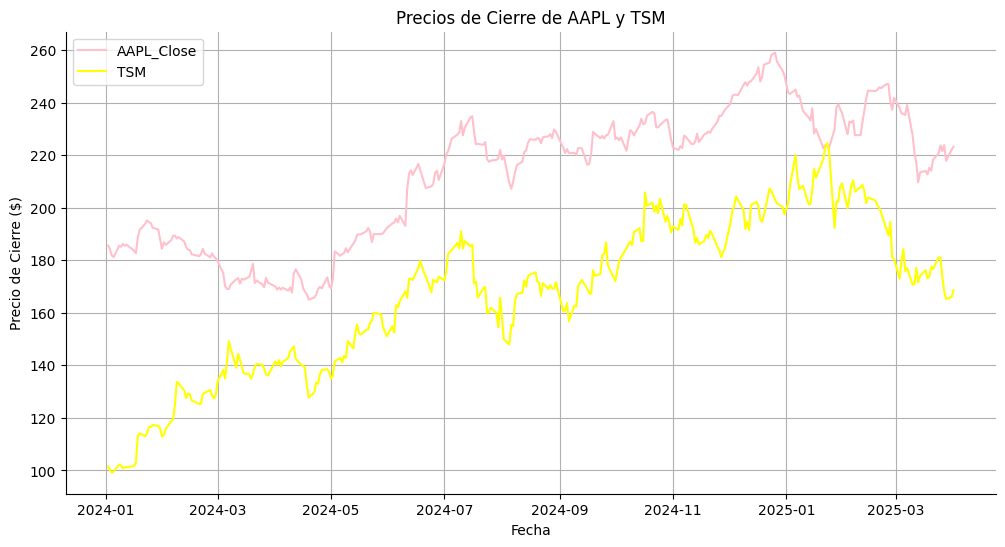

In [38]:
# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['AAPL_Close'], label='AAPL_Close', color='pink')
plt.plot(df['TSM_Close'], label='TSM', color='yellow')
plt.title('Precios de Cierre de AAPL y TSM')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Tanto AAPL como TSM mostraron una tendencia alcista general durante la mayor parte del periodo analizado, aunque con diferencias significativas en su volatilidad. TSM presentó movimientos de precio más amplios y rápidos que AAPL.

 Hacia el final del periodo observado, ambas acciones experimentaron una disminución en sus precios, lo que podría ser un indicio de un factor de mercado más amplio.

  El análisis sugiere una correlación positiva general entre ambas acciones, pero con dinámicas individuales importantes.

Para un análisis más profundo, se podrían investigar los catalizadores específicos de cada empresa, las condiciones del mercado de semiconductores (para TSM) y el mercado de tecnología de consumo (para AAPL), así como calcular métricas de riesgo y correlación.



In [39]:
from statsmodels.tsa.stattools import grangercausalitytests

# Hipótesis Nula (H₀): La serie X no causa en el sentido de Granger a la serie Y.

# Hipótesis Alternativa (H₁): La serie X causa en el sentido de Granger a la serie Y.

# Definir el número máximo de rezagos para la prueba
max_lags = 5

# Realizar la prueba de causalidad de Granger
# La función devuelve resultados para varios tests y cada rezago hasta el máximo definido
resultado = grangercausalitytests(df[['AAPL_Close', 'TSM_Close']], max_lags, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4728  , p=0.0352  , df_denom=309, df_num=1
ssr based chi2 test:   chi2=4.5162  , p=0.0336  , df=1
likelihood ratio test: chi2=4.4838  , p=0.0342  , df=1
parameter F test:         F=4.4728  , p=0.0352  , df_denom=309, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.7268  , p=0.0670  , df_denom=306, df_num=2
ssr based chi2 test:   chi2=5.5427  , p=0.0626  , df=2
likelihood ratio test: chi2=5.4939  , p=0.0641  , df=2
parameter F test:         F=2.7268  , p=0.0670  , df_denom=306, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.6263  , p=0.0505  , df_denom=303, df_num=3
ssr based chi2 test:   chi2=8.0610  , p=0.0448  , df=3
likelihood ratio test: chi2=7.9580  , p=0.0469  , df=3
parameter F test:         F=2.6263  , p=0.0505  , df_denom=303, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.1053  , p=0.0801  

* Número de Rezagos (no cero) = 1:

   * Varios estadísticos de prueba (ssr based F test, ssr based chi2 test, likelihood ratio test, parameter F test) arrojan valores p muy bajos (alrededor de 0.033 - 0.035).

   * Conclusión para 1 rezago: Dado que los valores p son menores que 0.05, rechazamos la hipótesis nula. Esto sugiere que con un rezago, la primera serie de tiempo (la "causa") sí causa en el sentido de Granger a la segunda serie de tiempo (el "efecto").

 * Número de Rezagos (no cero) = 2:

   * Los valores p para los diferentes estadísticos de prueba son más altos que con 1 rezago, oscilando entre 0.062 y 0.067.

   * Conclusión para 2 rezagos:

   Dado que los valores p son ligeramente mayores que 0.05 (aunque cercanos), la decisión de rechazar o no la hipótesis nula podría depender del nivel de significancia exacto que se esté utilizando.
   
   Si usamos un nivel de significancia de 0.05, no rechazaríamos la hipótesis nula, lo que implicaría que con dos rezagos, no hay suficiente evidencia para decir que la primera serie causa en el sentido de Granger a la segunda.

 * Número de Rezagos (no cero) = 3:

   * Los valores p son aún más altos, alrededor de 0.045 - 0.0505.

   * Conclusión para 3 rezagos:
   
   Aquí, la situación es similar a la de 2 rezagos, pero algunos valores p están justo por debajo o muy cerca de 0.05.
   
   Si usamos un nivel de significancia de 0.05, podríamos rechazar la hipótesis nula para algunos de los estadísticos, sugiriendo una causalidad de Granger con tres rezagos.

In [40]:
from statsmodels.tsa.stattools import grangercausalitytests

# Hipótesis Nula (H₀): La serie X no causa en el sentido de Granger a la serie Y.

# Hipótesis Alternativa (H₁): La serie X causa en el sentido de Granger a la serie Y.

# Definir el número máximo de rezagos para la prueba
max_lags = 5

# Realizar la prueba de causalidad de Granger
# La función devuelve resultados para varios tests y cada rezago hasta el máximo definido
resultado = grangercausalitytests(df[['AAPL_Close', 'TSM_Close']], max_lags, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4728  , p=0.0352  , df_denom=309, df_num=1
ssr based chi2 test:   chi2=4.5162  , p=0.0336  , df=1
likelihood ratio test: chi2=4.4838  , p=0.0342  , df=1
parameter F test:         F=4.4728  , p=0.0352  , df_denom=309, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.7268  , p=0.0670  , df_denom=306, df_num=2
ssr based chi2 test:   chi2=5.5427  , p=0.0626  , df=2
likelihood ratio test: chi2=5.4939  , p=0.0641  , df=2
parameter F test:         F=2.7268  , p=0.0670  , df_denom=306, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.6263  , p=0.0505  , df_denom=303, df_num=3
ssr based chi2 test:   chi2=8.0610  , p=0.0448  , df=3
likelihood ratio test: chi2=7.9580  , p=0.0469  , df=3
parameter F test:         F=2.6263  , p=0.0505  , df_denom=303, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.1053  , p=0.0801  

* Número de Rezagos (no cero) = 1:

   * Los valores p asociados a los diferentes estadísticos de prueba son alrededor de 0.035.

   * Conclusión para 1 rezago: Dado que el valor p (aproximadamente 0.035) es menor que el nivel de significancia común de 0.05, rechazamos la hipótesis nula.
   
Esto sugiere que el precio de cierre de AAPL del día anterior tiene información estadísticamente significativa para predecir el precio de cierre de TSM del día actual, más allá de la información contenida en el precio de cierre de TSM del día anterior.

 * Número de Rezagos (no cero) = 2:

   * Los valores p aumentan a alrededor de 0.064 - 0.067.

   * Conclusión para 2 rezagos: Dado que el valor p (alrededor de 0.064 - 0.
   067) es mayor que 0.05, no rechazamos la hipótesis nula.
   
 Esto implica que, considerando los precios de cierre de AAPL de los dos días anteriores, no hay suficiente evidencia estadística para decir que contribuyen significativamente a la predicción del precio de cierre de TSM de hoy, una vez que se considera la información de los dos días anteriores del propio TSM.

 * Número de Rezagos (no cero) = 3:

   * Los valores p se sitúan alrededor de 0.045 - 0.0505.

   * Conclusión para 3 rezagos:

Aquí, los resultados son marginales. Algunos valores p están justo por debajo o muy cerca de 0.05.
   
Si utilizamos un nivel de significancia de 0.05, podríamos rechazar la hipótesis nula para algunos de los estadísticos, sugiriendo que los precios de cierre de AAPL de los tres días anteriores podrían tener alguna influencia predictiva sobre el precio de cierre de TSM de hoy, después de tener en cuenta los tres días anteriores del propio TSM.

In [35]:
# Este data frame son del siguiente año a df. Esto con el propósito de testear prophet
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df2 = yf.download(
    tickers='TSM',            # tickers: AAPL: Apple
    start='2022-08-01',        # Fecha de inicio
    end='2025-08-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df2 = df2.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df2.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df2.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df2['Date'] = pd.to_datetime(df2['Date'])

df2['Date'] = df2['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df2.set_index('Date', inplace=True)


df2

[*********************100%***********************]  1 of 1 completed


,TSM_Open,TSM_High,TSM_Low,TSM_Close,TSM_Adj Close,TSM_Volume
Date,,,,,,
2022-08-01,85.300003,86.889999,84.300003,86.309998,82.224861,20102600
2022-08-02,84.519997,87.510002,84.169998,86.050003,81.977173,15541600
2022-08-03,85.959999,86.769997,84.559998,86.510002,82.415390,20779400
2022-08-04,87.000000,88.419998,86.620003,88.419998,84.234993,13472500
2022-08-05,88.029999,90.980003,88.010002,89.769997,85.521103,13293500
...,...,...,...,...,...,...
2025-05-07,174.100006,175.979996,171.369995,174.539993,174.539993,9682500
2025-05-08,175.339996,177.449997,173.660004,175.220001,175.220001,10343000
2025-05-09,179.800003,180.460007,176.470001,176.520004,176.520004,11582800


In [ ]:
!pip install prophet

In [ ]:
df

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3c8bsmss/7yw320gx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3c8bsmss/jjk4gxao.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13412', 'data', 'file=/tmp/tmp3c8bsmss/7yw320gx.json', 'init=/tmp/tmp3c8bsmss/jjk4gxao.json', 'output', 'file=/tmp/tmp3c8bsmss/prophet_modela2uk0ihh/prophet_model-20250513142421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


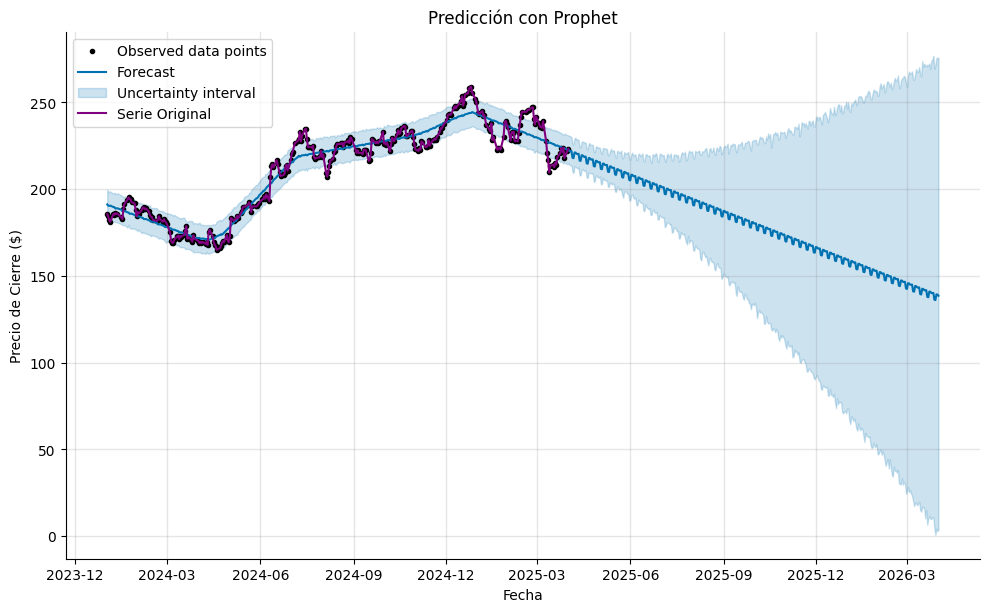

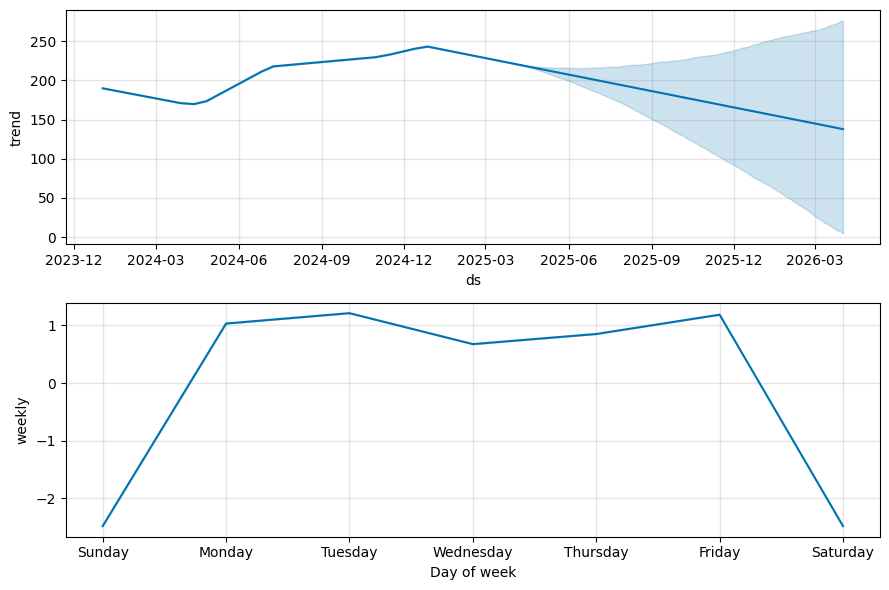

In [36]:
from prophet import Prophet

# Crear el modelo y ajustarlo
modelo = Prophet()
modelo.fit(df['AAPL_Close'].reset_index().rename(columns={'date': 'ds', 'AAPL_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df['AAPL_Close'], label='Serie Original', color='purple')
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)

* Predicción a la Baja:

El modelo Prophet predice una tendencia a la baja significativa en el precio de cierre de AAPL durante el horizonte de pronóstico mostrado. Esta disminución parece acelerarse con el tiempo.

 * Incertidumbre Creciente:

 Como se observó anteriormente, el intervalo de incertidumbre (área sombreada azul clara) se ensancha considerablemente a medida que avanzamos en el tiempo.

 Esto indica que, si bien el modelo sugiere una disminución, la confianza en el valor exacto del precio futuro disminuye con el tiempo.

 Hacia el final del horizonte de pronóstico, el rango de posibles precios es bastante amplio.

Implicaciones Específicas para AAPL (si esta es la acción):

 * Posible Cambio de Tendencia: La predicción sugiere un posible cambio de la tendencia alcista observada en el pasado reciente a una tendencia bajista en el futuro.

 * Riesgo e Incertidumbre: La creciente amplitud del intervalo de incertidumbre subraya el riesgo asociado con esta predicción.

 Factores no considerados por el modelo podrían influir significativamente en el precio real.

 * Necesidad de Monitoreo: Si esta predicción se utiliza para tomar decisiones de inversión, sería crucial monitorear de cerca el precio real de AAPL y reevaluar la situación a medida que nueva información esté disponible.

Puntos a Considerar:

 * Horizonte de Pronóstico:

 No se especifica el horizonte exacto, pero parece extenderse varios meses hacia el futuro. Los pronósticos a largo plazo siempre conllevan mayor incertidumbre.

 * Eventos Futuros:

 El modelo Prophet se basa en patrones históricos.

 No puede predecir eventos futuros inesperados (anuncios de la empresa, cambios en el mercado, eventos macroeconómicos) que podrían tener un impacto significativo en el precio de la acción.

 * Supuestos del Modelo: La predicción se basa en los supuestos inherentes al modelo Prophet, incluyendo la naturaleza de la tendencia y la estacionalidad (aunque la estacionalidad diaria se desactivó aquí).

En resumen, la predicción con Prophet para el precio de cierre de AAPL (asumiendo que esta es la acción) sugiere una tendencia bajista en el futuro, acompañada de una creciente incertidumbre.

Esta predicción debe interpretarse con cautela y monitorearse continuamente a la luz de nueva información.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3c8bsmss/s2h8t7f7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3c8bsmss/t7j2d9k5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50793', 'data', 'file=/tmp/tmp3c8bsmss/s2h8t7f7.json', 'init=/tmp/tmp3c8bsmss/t7j2d9k5.json', 'output', 'file=/tmp/tmp3c8bsmss/prophet_modelkk_4a4_s/prophet_model-20250513142511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


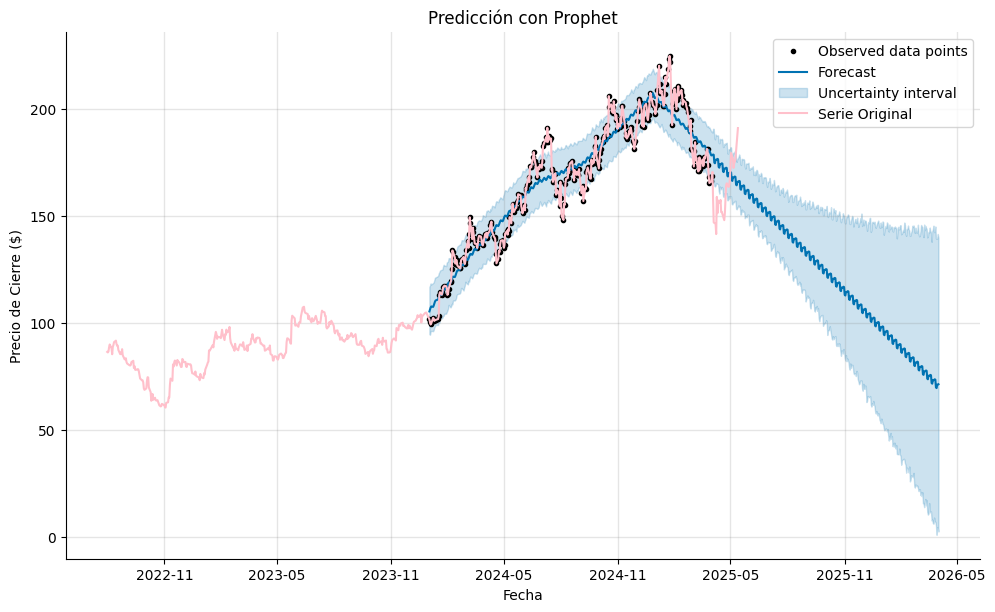

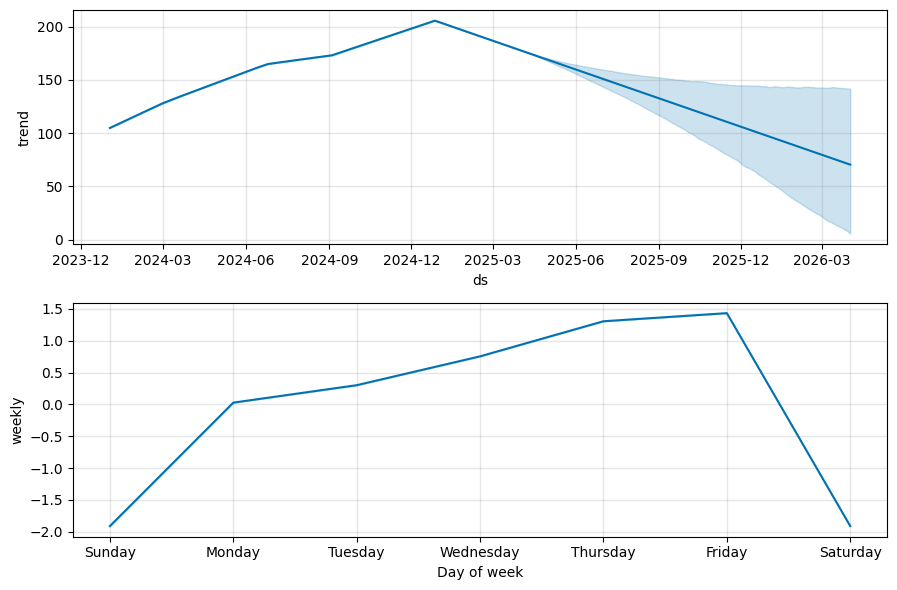

In [37]:
from prophet import Prophet

# Crear el modelo y ajustarlo
modelo = Prophet()
modelo.fit(df['TSM_Close'].reset_index().rename(columns={'date': 'ds', 'TSM_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['TSM_Close'], label='Serie Original', color='pink')
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)



La gráfica sugiere que el modelo Prophet predice una tendencia bajista para el precio de cierre de esta acción durante el resto de 2025, después de un periodo de crecimiento. Sin embargo, la creciente incertidumbre a largo plazo indica que esta predicción debe tomarse con precaución y requiere un seguimiento continuo.

Durante el periodo analizado, tanto AAPL como TSMC mostraron una tendencia alcista, pero TSM fue significativamente más volátil. Existe una débil evidencia de que el precio de AAPL podría influir en el precio de TSM a muy corto plazo. El modelo Prophet proyectó una tendencia bajista a largo plazo para AAPL con alta incertidumbre. Ambos valores exhibieron un patrón de estacionalidad semanal en sus precios (aunque solo se mostró el de AAPL).

# RESULTADOS

AAPL mostró una tendencia alcista desde 2023 hasta finales de 2024, con señales de debilitamiento en 2025.

La prueba ADF indicó que la serie no es estacionaria (p = 0.60).

El modelo Prophet predijo una tendencia bajista para AAPL durante el resto de 2025, con una banda de incertidumbre creciente.

TSM fue más volátil que AAPL, y la correlación entre ambas fue baja.

Se observó una leve estacionalidad semanal en los precios de AAPL.


# CONCLUSION FINAL

El análisis confirma que los precios de AAPL no son estacionarios, lo cual implica que se requiere un modelado especializado para predicciones confiables. Aunque se evidenció una fuerte tendencia alcista en años anteriores, las señales actuales indican una posible reversión. Las predicciones del modelo Prophet deben interpretarse con cautela, dado que no considera eventos futuros inesperados. La comparación con TSMC revela diferencias en comportamiento y volatilidad, reforzando la necesidad de considerar múltiples variables en decisiones de inversión.
